# Geely Auto CaseStudy

## Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. 

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

#### The company wants to know:

1. Which variables are significant in predicting the price of a car
2. How well those variables describe the price of a car

## Business Goal 

**Build a model the price of cars with the available independent variables**
- It will be used by the management to understand how exactly the prices vary with the independent variables. 

They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. 

Further, the model will be a good way for management to understand the pricing dynamics of a new market. 



# 1 - Importing Dependencies

In [1]:
# import neccessary libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_row', 1000)
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
import seaborn as sns

# configurations
%matplotlib inline
sns.set_style('whitegrid')

# supress warnings
import warnings
warnings.filterwarnings('ignore')

# 2 - Read and Expore Dataset

In [2]:
# read dataset
car_df = pd.read_csv("CarPrice.csv")

# display top 5 rows
car_df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [3]:
# read data dictionary
df_dict = pd.read_csv("Data_Dictionary_carprices.csv")
df_dict

,Col_name,Definition
0,Car_ID,Unique id of each observation (Interger)
1,Symboling,"Its assigned insurance risk rating, A value of..."
2,carCompany,Name of car company (Categorical)
3,fueltype,Car fuel type i.e gas or diesel (Categorical)
4,aspiration,Aspiration used in a car (Categorical)
5,doornumber,Number of doors in a car (Categorical)
6,carbody,body of car (Categorical)
7,drivewheel,type of drive wheel (Categorical)
8,enginelocation,Location of car engine (Categorical)
9,wheelbase,Weelbase of car (Numeric)


In [4]:
# dimensions
print("# Rows    : ", car_df.shape[0])
print("# Columns : ", car_df.shape[1])

# Rows    :  205
# Columns :  26


In [5]:
# meta-data
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

- No null values
- Some categorical values have been listed as ints / floats. We will fix this later

In [6]:
# meta-data
car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# 3 - Data Cleaning
- Remove duplicates

In [7]:
# remove duplicates if any
car_df.drop_duplicates(inplace=True)

# check dimensions
print("# Rows    : ", car_df.shape[0])
print("# Columns : ", car_df.shape[1])

# Rows    :  205
# Columns :  26


    - Therefore, there were no duplicate columns in the dataset

- Drop `car_ID`, as it is a unique identifier

In [8]:
car_df.drop("car_ID", axis=1, inplace=True)

# check dimensions
print("# Rows    : ", car_df.shape[0])
print("# Columns : ", car_df.shape[1])

# Rows    :  205
# Columns :  25


# 4 - Data Preparation
### `CarName`
- Feature `CarName` has  2 parts 
    - Name of the car company
    - Name of the car model
- Let us separate the Company name from the model name for better understanding

In [9]:
print(len(car_df["CarName"].unique()))
car_df["CarName"].unique()

147


array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

### `CarCompany`

In [10]:
# create 'CarCompany' feature
car_df["CarCompany"] = car_df["CarName"].apply(lambda x : x.split(' ')[0].lower())  # split on 'space character', retain the 1st part and lowercase it

# print top 5 rows
car_df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [11]:
# print all car companies
for i in car_df["CarCompany"].unique(): print(i)

# count total car companies
print("\nTotal car companies : ", len(car_df["CarCompany"].unique()))  # 27

alfa-romero
audi
bmw
chevrolet
dodge
honda
isuzu
jaguar
maxda
mazda
buick
mercury
mitsubishi
nissan
peugeot
plymouth
porsche
porcshce
renault
saab
subaru
toyota
toyouta
vokswagen
volkswagen
vw
volvo

Total car companies :  27


- There are multiple spellings for the same brand like 
    - 'porsche' & 'porcshce'
    
- Which must be corrected

In [12]:
# normalize brand names
car_df["CarCompany"] = car_df["CarCompany"].apply(lambda x : 'porsche' if (x == 'porcshce') else x)  # porsche
car_df["CarCompany"] = car_df["CarCompany"].apply(lambda x : 'volkswagen' if (x == 'vokswagen' or x == 'vw') else x)  # volkswagen
car_df["CarCompany"] = car_df["CarCompany"].apply(lambda x : 'toyota' if (x == 'toyouta') else x)  # toyota
car_df["CarCompany"] = car_df["CarCompany"].apply(lambda x : 'subaru' if (x == 'saab') else x)  # subaru
car_df["CarCompany"] = car_df["CarCompany"].apply(lambda x : 'mazda' if (x == 'maxda') else x)  # mazda
car_df["CarCompany"] = car_df["CarCompany"].apply(lambda x : 'alfa-romeo' if (x == 'alfa-romero') else x)  # alfa-romeo

In [13]:
# print all car companies
for i in car_df["CarCompany"].unique(): print(i)

# count total car companies
print("\nTotal car companies : ", len(car_df["CarCompany"].unique()))  # 21

alfa-romeo
audi
bmw
chevrolet
dodge
honda
isuzu
jaguar
mazda
buick
mercury
mitsubishi
nissan
peugeot
plymouth
porsche
renault
subaru
toyota
volkswagen
volvo

Total car companies :  21


- Total car companies reduced from 27 to 21
- Drop `CarName` from the dataset as it is not required anymore

In [14]:
# drop 'CarName'
car_df.drop("CarName", axis=1, inplace=True)

# check dimensions
print("# Rows    : ", car_df.shape[0])
print("# Columns : ", car_df.shape[1])

# Rows    :  205
# Columns :  25


### `Symboling`
- `Symboling` feature is a categorical feature that has int type

In [15]:
car_df["symboling"].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

#### `symboling` is a categorical variable and ranges from -2 to +3

Therefore, by given definition, we can classify these values as below -
-  -1 & -2   ->    safe
-  1 & 0     ->    moderate
-  3 & 2     ->    risky

In [16]:
# classifying 'symboling' into different classes
car_df["symboling"] = car_df["symboling"].apply(lambda x : 'safe' if (x == -1 or x == -2) else x)
car_df["symboling"] = car_df["symboling"].apply(lambda x : 'moderate' if (x == 1 or x == 0) else x)
car_df["symboling"] = car_df["symboling"].apply(lambda x : 'risky' if (x == 3 or x == 2) else x)

In [17]:
# print unique values in 'symboling' feature
car_df["symboling"].unique()  # the datatype got fixed automatically

array(['risky', 'moderate', 'safe'], dtype=object)

In [18]:
car_df["symboling"].value_counts()

moderate    121
risky        59
safe         25
Name: symboling, dtype: int64

# 5 - Exploratory Data Analysis
- Univariate, Bi-variate & Multi-variate Analysis

### Pairplot - Multivariate Analysis

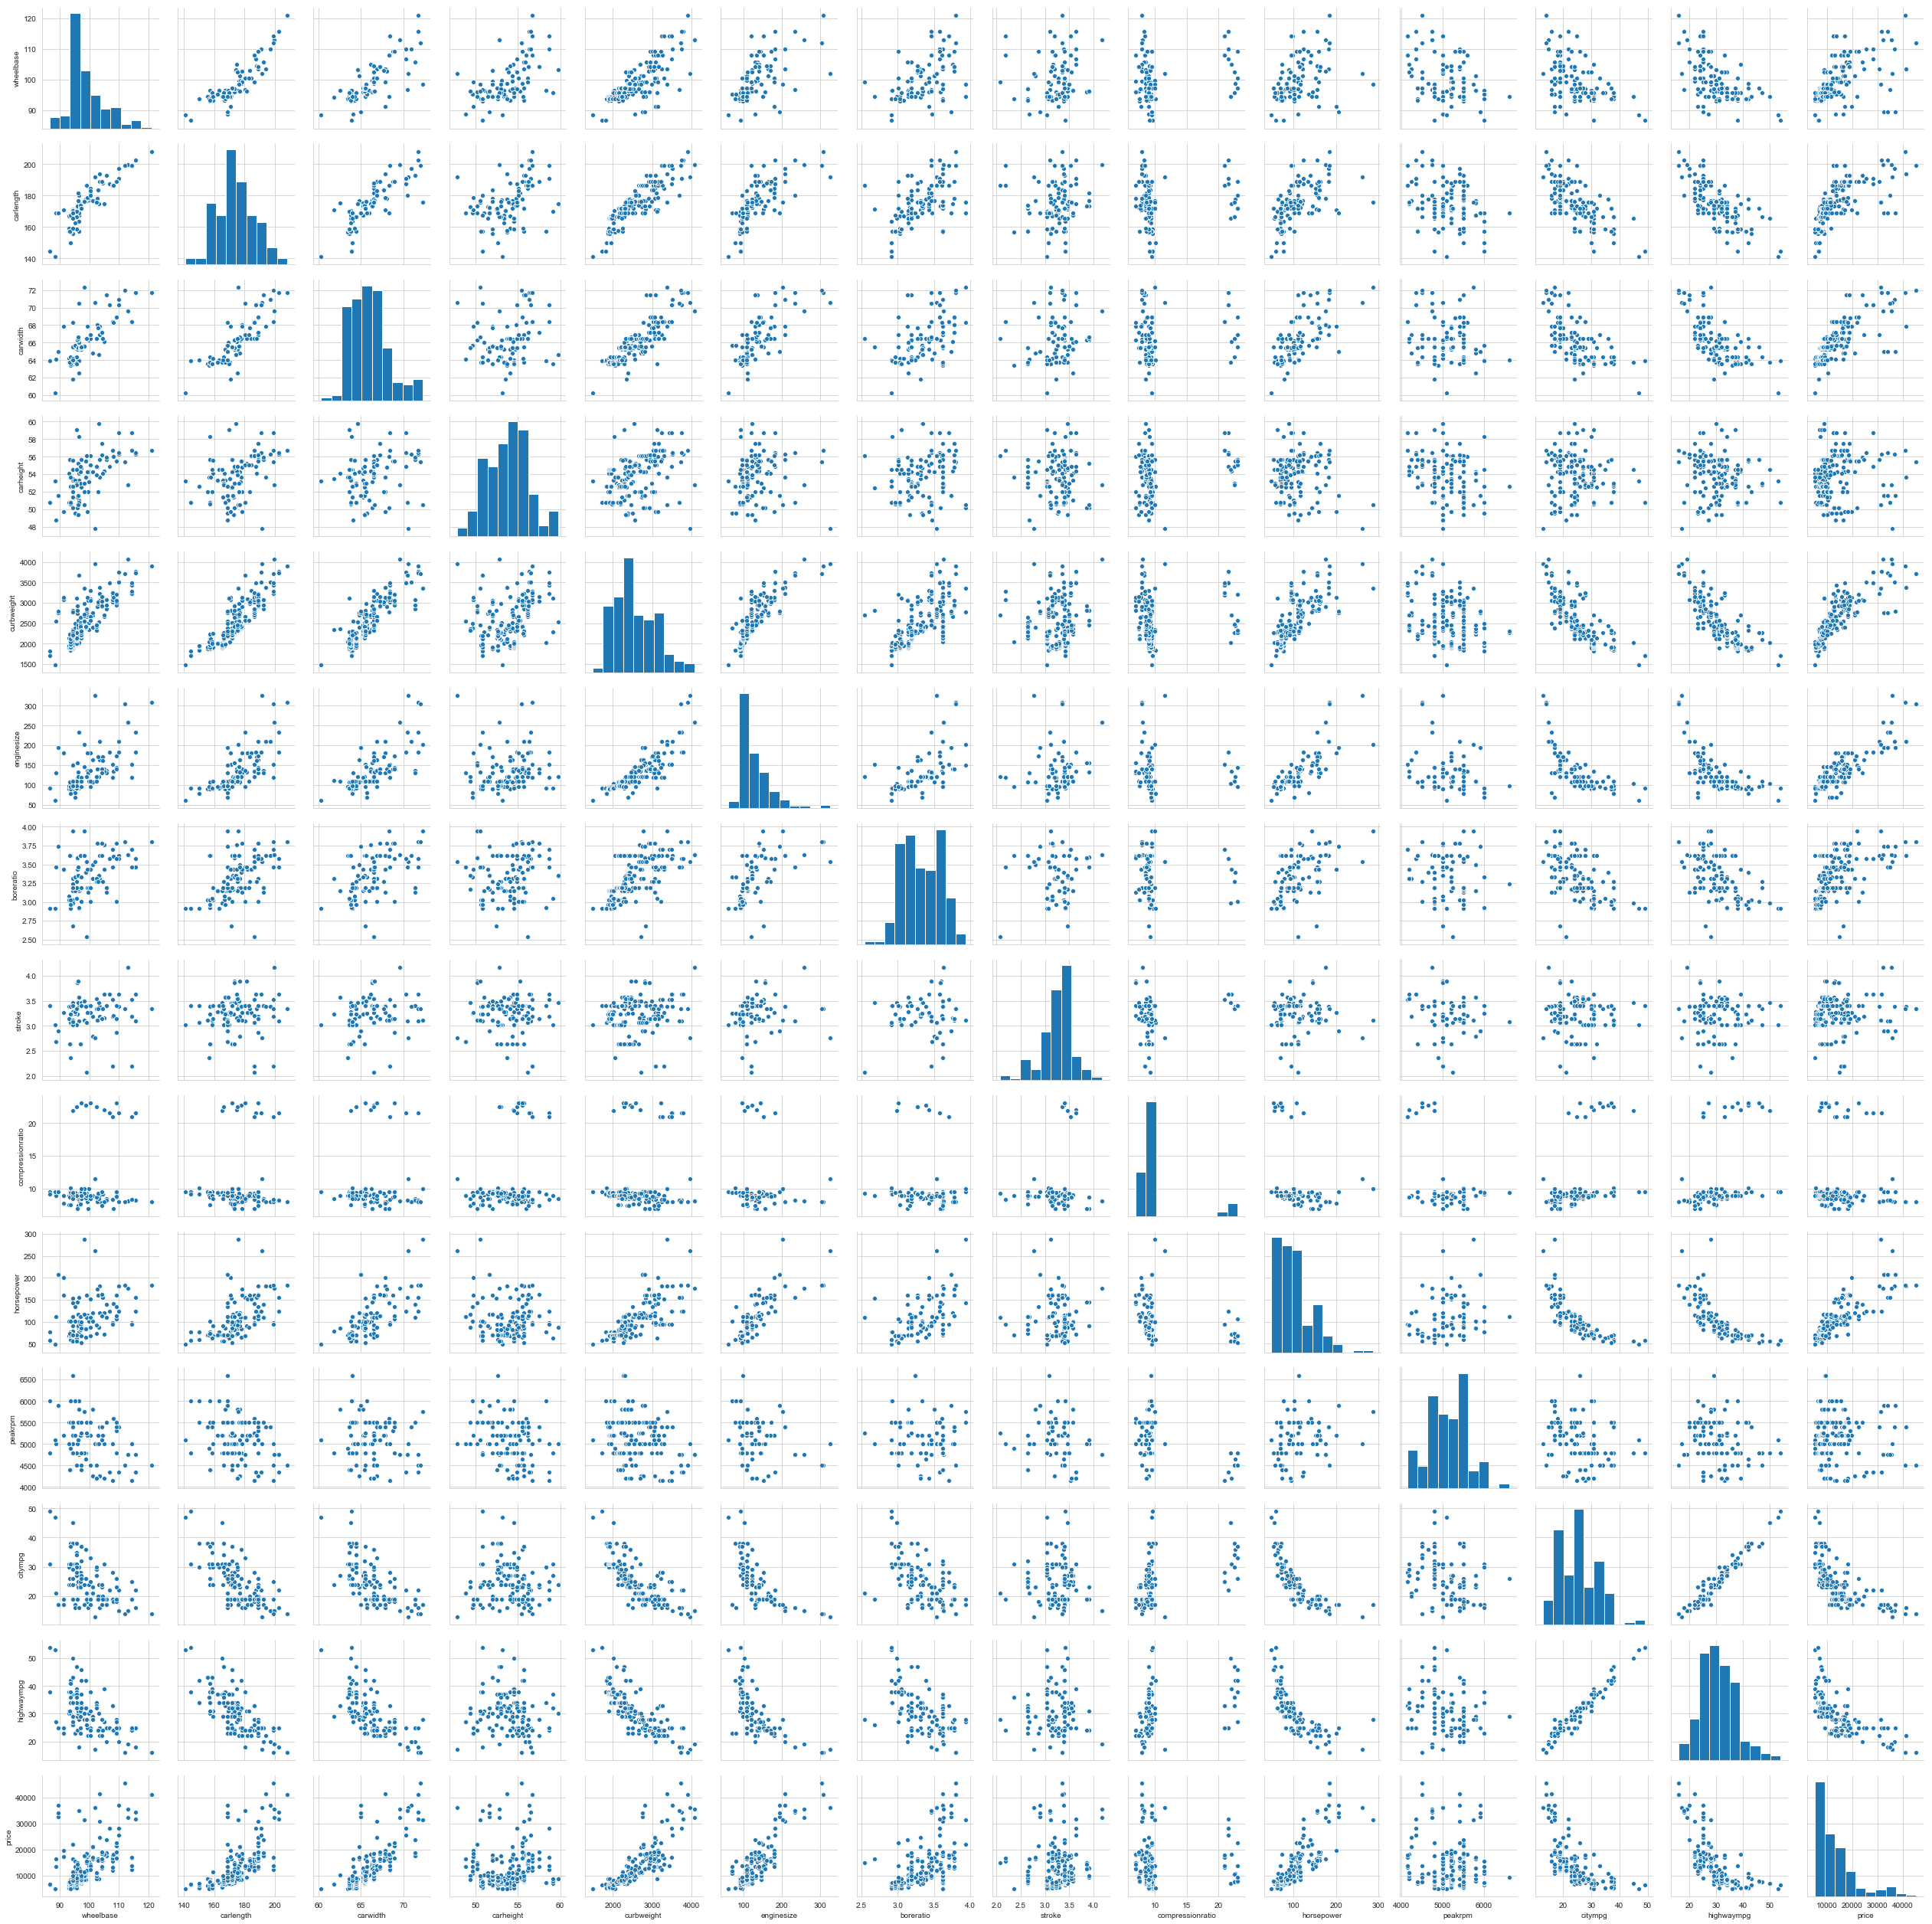

In [19]:
# pairplot on all features
sns.pairplot(car_df)

- We can see that some of the features are highly correlated with each other
- plot correlated heatmap

### Heatmap - Multivariate Analysis

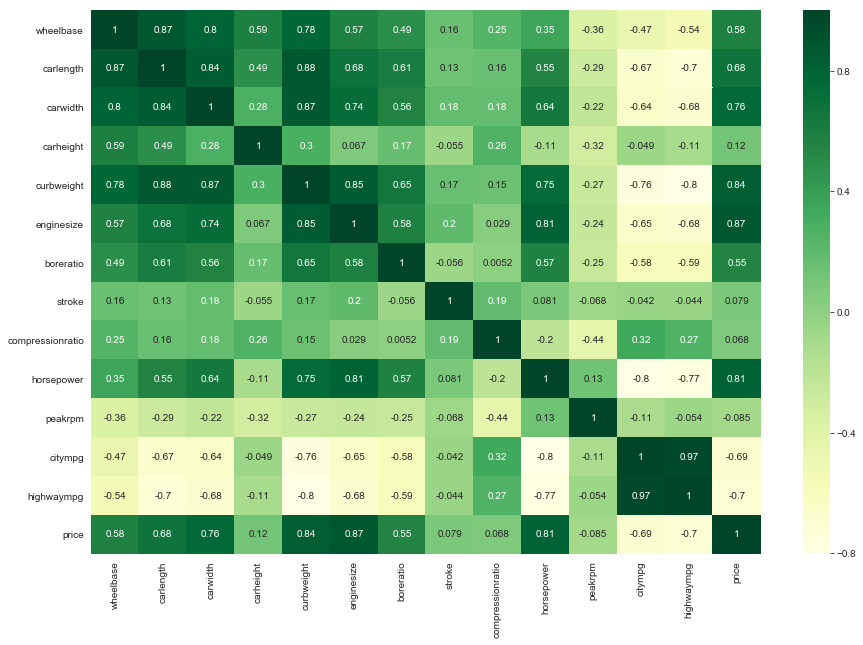

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(car_df.corr(), annot=True, cmap = "YlGn")

- There are multiple features that are contributing to the `price` variable

#### Positive correlations with `price`
- `enginesize` = 0.87
- `curbweight` = 0.84
- `horsepower` = 0.81
- `carwidth`   = 0.76
- `carlength`  = 0.68
- `wheelbase`  = 0.58
- `boreratio`  = 0.55

#### Negative correlation with 'price'
- `highwaympg` = -0.70
- `citympg`    = -0.69

## Multicollinearity
- Some of the variables are highly correlated with each other
- Which may contribute towards multicollinearity in the system
- We will rid off such features in the future.

##### For instance, some of the variables which have positive correlation between each other are as follows - 
1. **`carlength`** has a postive correlation with `wheelbase`, `carwidth`, `curbweight`, `enginesize`, `boreratio`
2. **`curbweight`** has a postive correlation with `horsepower`, `boreratio`, `enginesize`, `carlength`, `carwidth`, `wheelbase`
3. **`enginesize`** has a postive correlation with `horsepower`, `curbweight`, `carlength`, `carwidth`, `wheelbase`
<br><br>and so on . . . 

## Categorical Variables


In [21]:
# list all categorical variables
cat_var = car_df.columns[car_df.dtypes == 'object']
for i in cat_var: print(i)

symboling
fueltype
aspiration
doornumber
carbody
drivewheel
enginelocation
enginetype
cylindernumber
fuelsystem
CarCompany


In [22]:
print("Total categorical variables : ", len(cat_var))

Total categorical variables :  11


### Boxplots
- Effect of each feature on `price`

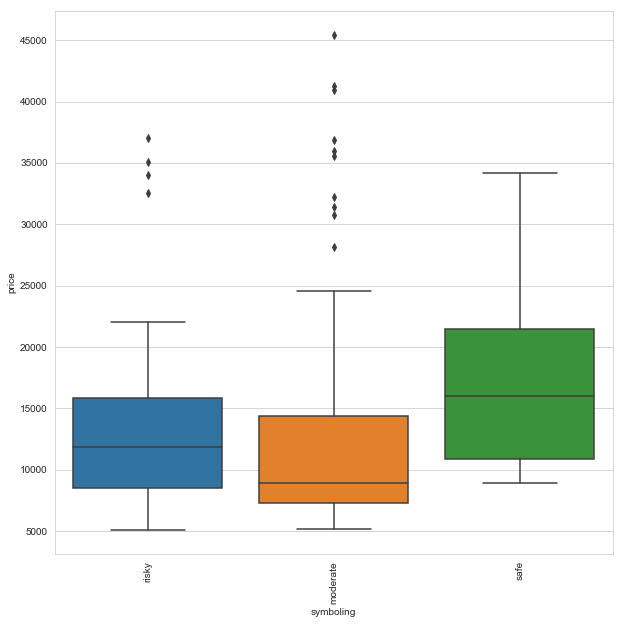

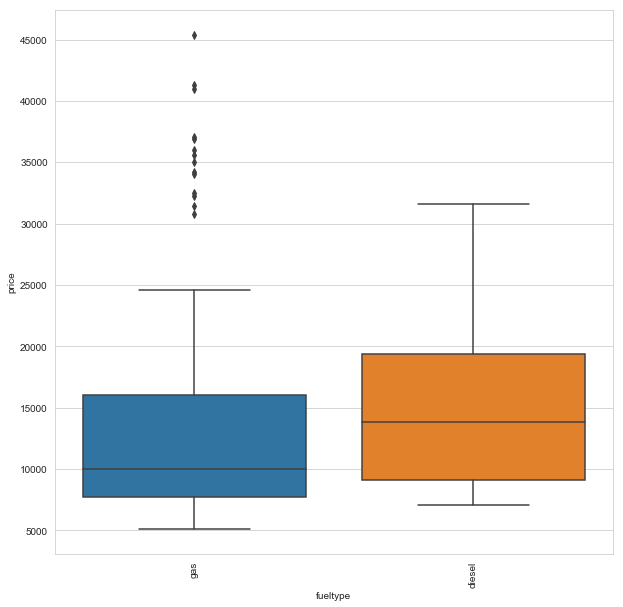

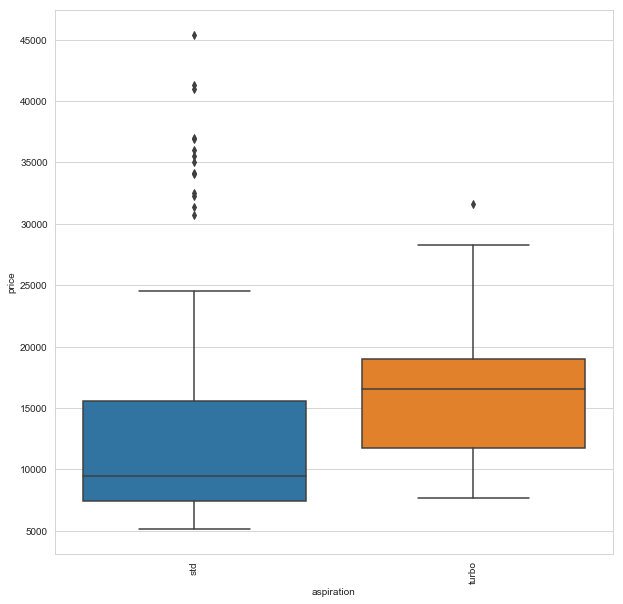

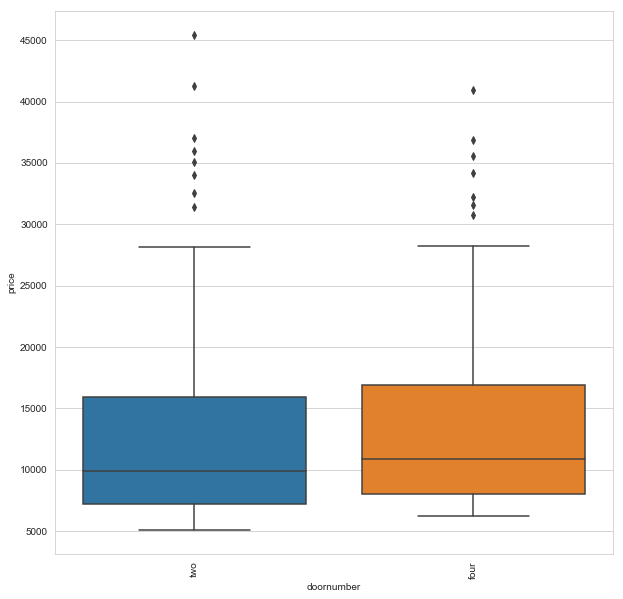

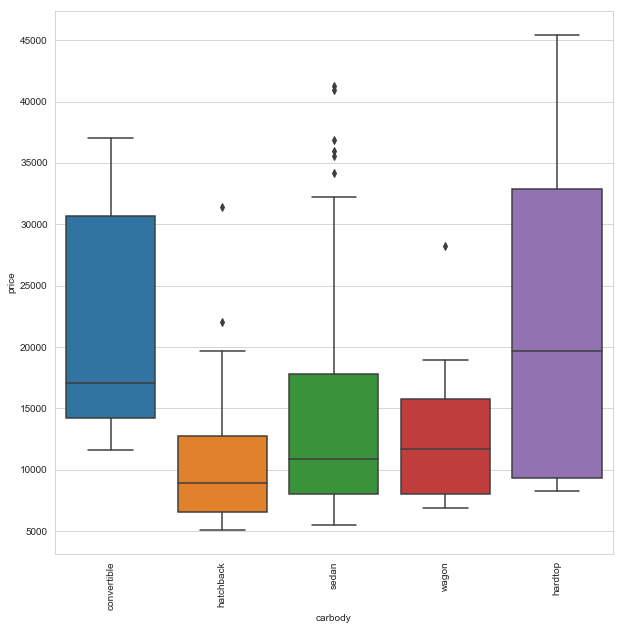

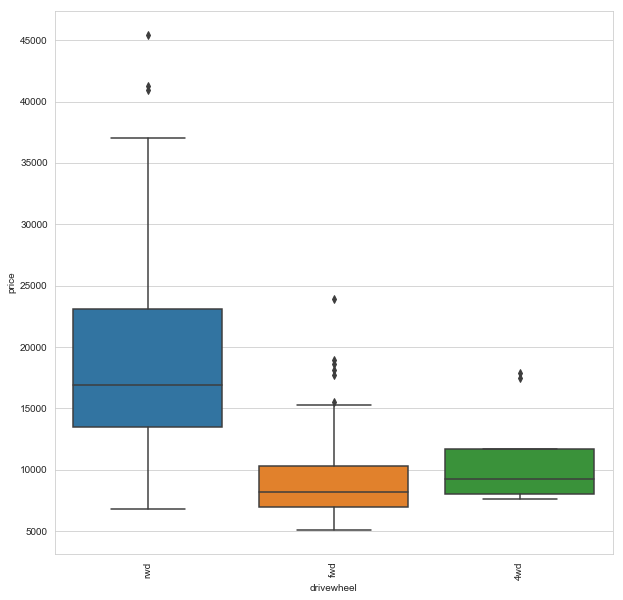

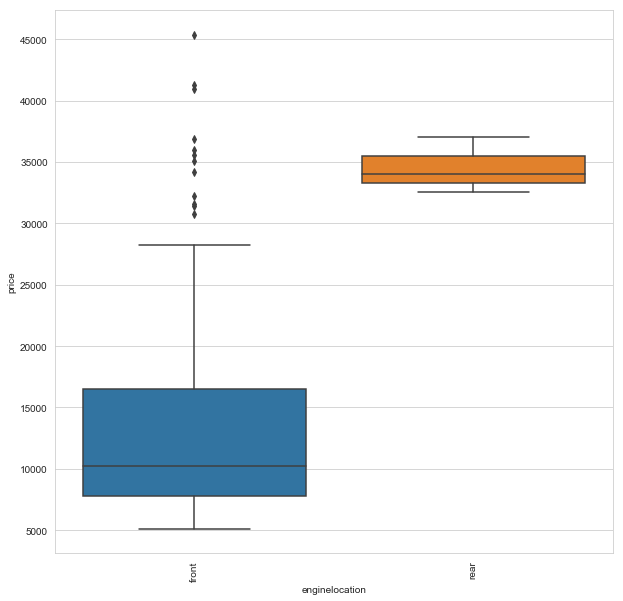

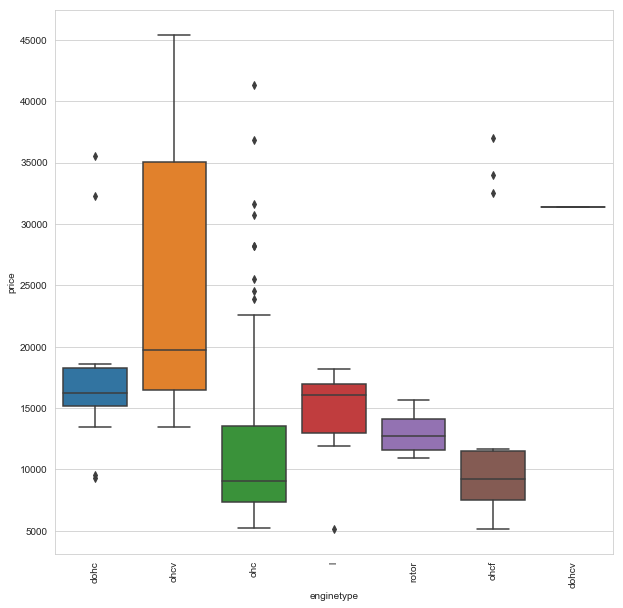

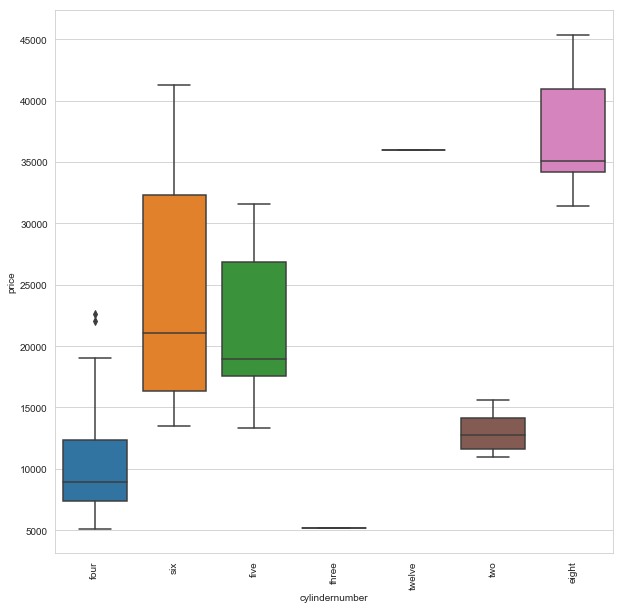

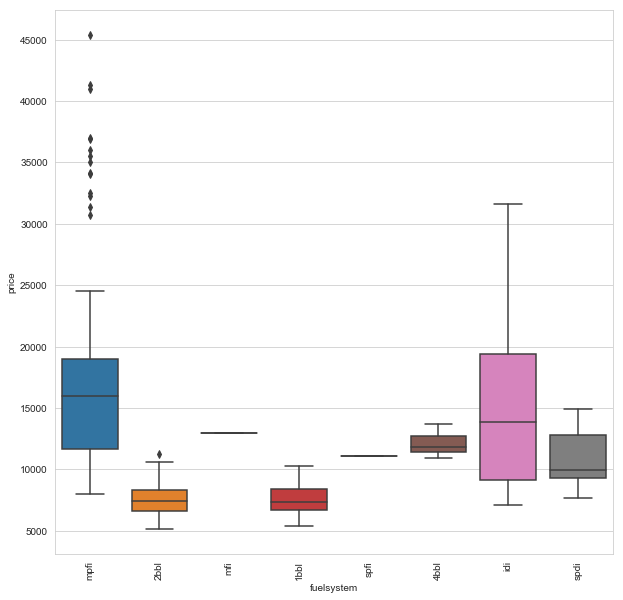

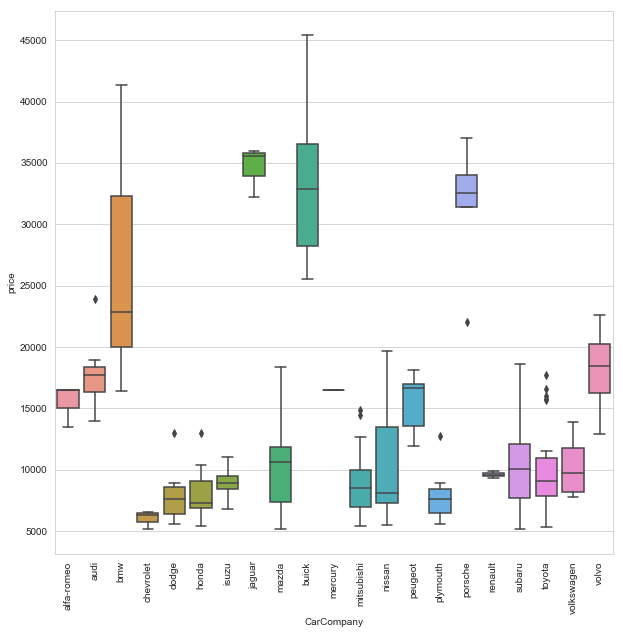

In [23]:
for i in cat_var:
    plt.figure(figsize=(10,10))
    plt.xticks(rotation=90)
    sns.boxplot(x=i, y='price', data=car_df)

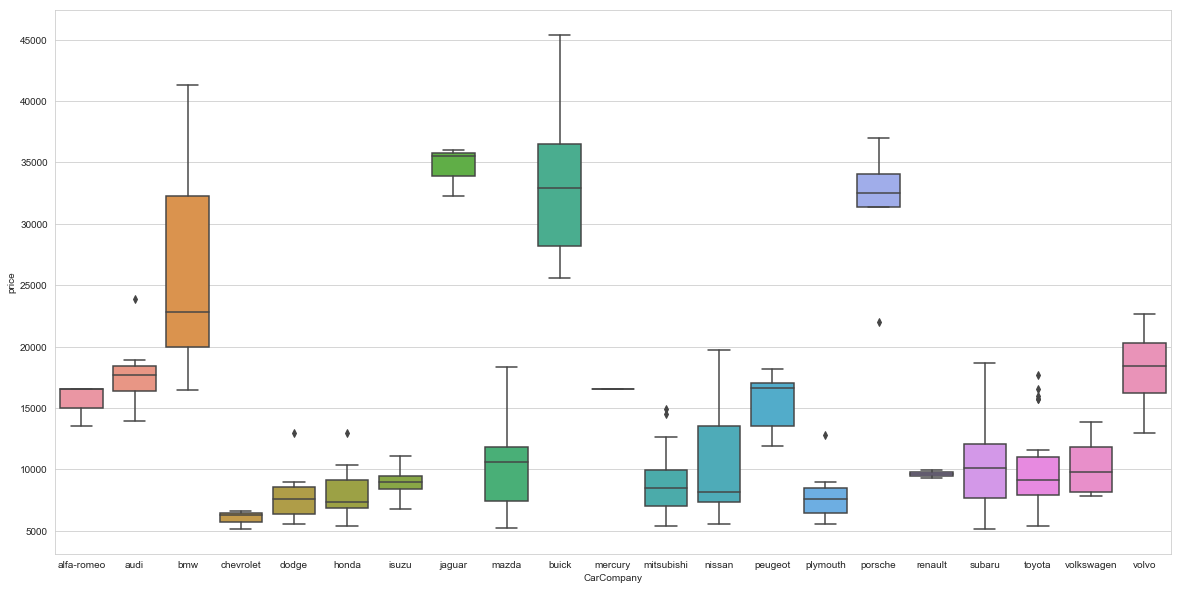

In [24]:
# boxplot for Car Company Name
plt.figure(figsize=(20,10))
sns.boxplot(x=car_df['CarCompany'], y='price', data=car_df)

#### Observations
- Each car company sells in a different price range, i.e., they have their own segment
    - Some are high-end car, moderate-range cars and low-end range car companies
- Few features like `cylindernumber`, `enginetype`, `carbody` has huge impact on the `price` variable
- `Symboling` features classifies cars as 'risky', 'moderate' or 'safe'
    - Cars in the 'safe' segment are priced higher
- `fueltype`
    - 'diesel' cars have a higher price
- `aspiration`
    - 'turbo' cars are sold at a higher price
- `doornumber`
    - both 'two' & 'four' doored cars sell at similar price range
- `drivewheel`
    - 'rwd' types sells at higher prices
- `enginelocation`
    - 'rear' enginelocation sells at a way higher price range

### Barplots
- Percentage distribution on each categorical variable

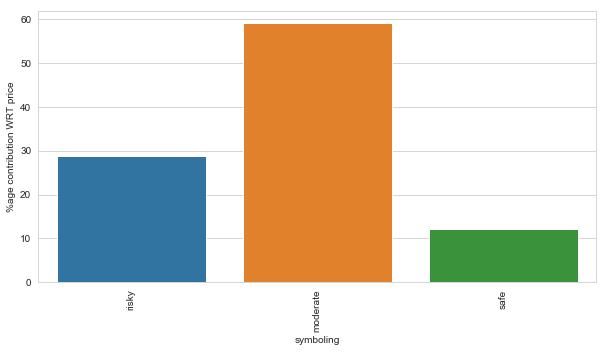

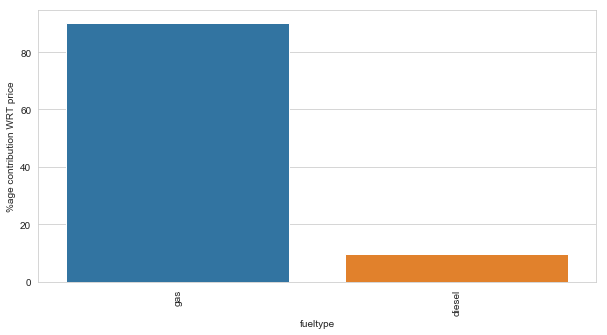

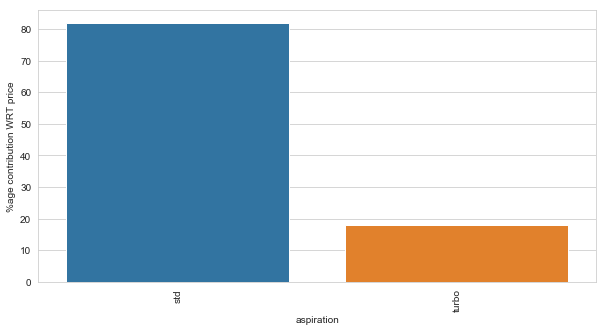

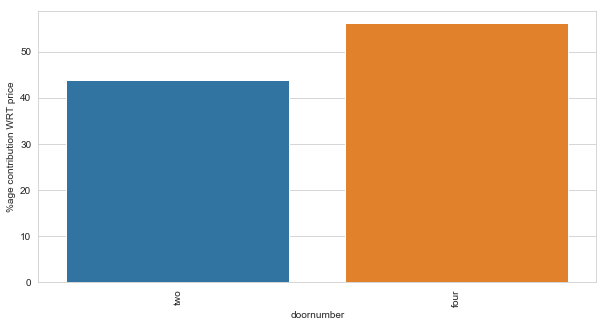

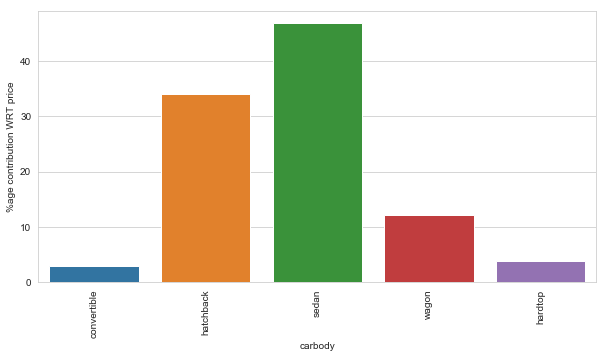

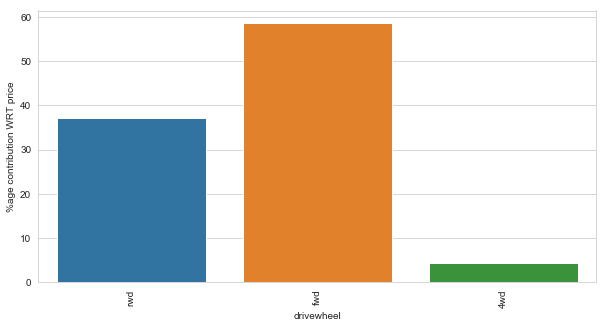

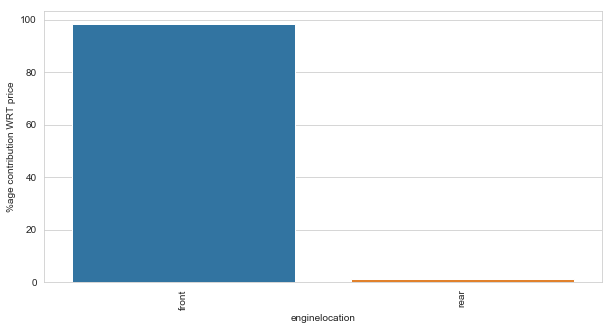

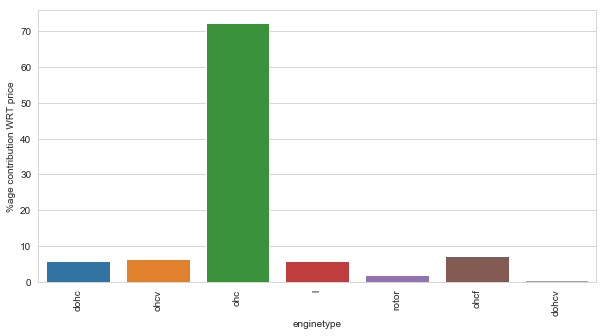

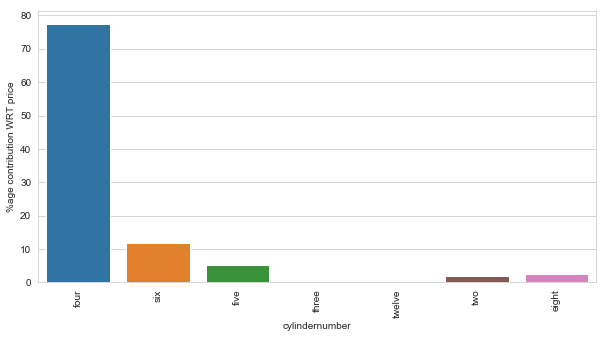

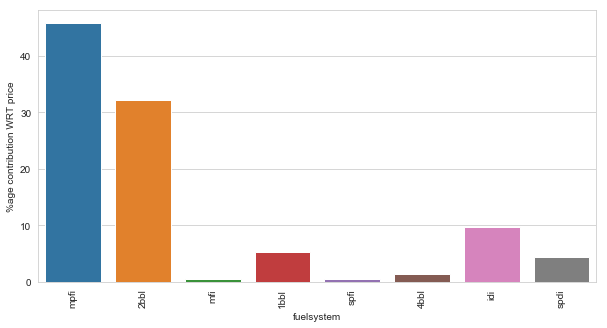

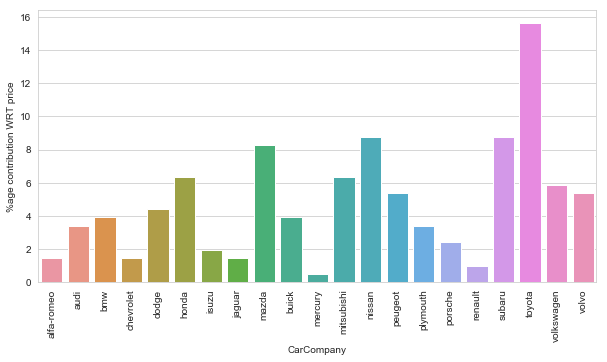

In [25]:
for i in cat_var:
    plt.figure(figsize=(10,5))
    sns.barplot(x=i, y='price', data=car_df, estimator = (lambda x : len(x)/len(car_df)*100))
    plt.xticks(rotation=90)
    plt.ylabel("%age contribution WRT price")

#### Observation
- `symboling`
    - almost 60% share is off 'moderate' cars
    - almost 30% share is off 'risky' cars
    - over 10% share is off 'safe' cars
- `fueltype`
    - over 90% share is off 'gas' fueled cars
- `doornumber`
    - healthy share between both categories - 'two' & 'four'
- `carbody`
    - 'sedan' is sold the most followed by 'hatchback'
- `enginelocation`
    - almost 100% cars have enginelocation in 'front'
- `enginetype`
    - 'ohc' enginetype is sold the most  
- `cylindernumber`
    - 'four' cylindernumber has the highest share of more than 80%
- `CarCompany`
    - 'toyota' is sold the most amongst all other car companies

## Numeric Variables

In [26]:
# list all numeric variables
num_var = car_df.columns[car_df.dtypes != 'object']
# display all numeric variables
for i in num_var: print(i)
# number of numeric variables
print("\n# Numeric Variables : ",len(num_var))

wheelbase
carlength
carwidth
carheight
curbweight
enginesize
boreratio
stroke
compressionratio
horsepower
peakrpm
citympg
highwaympg
price

# Numeric Variables :  14


### Distplots - Univariate Analysis

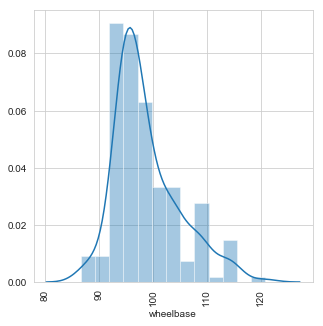

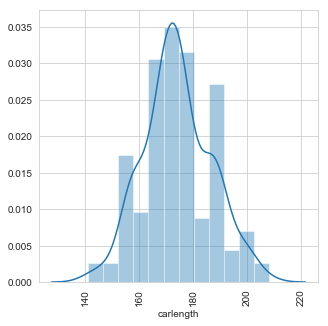

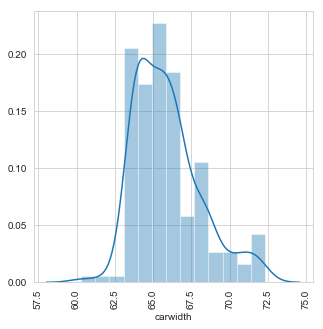

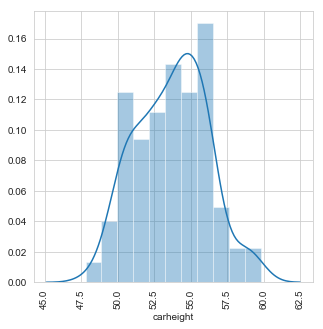

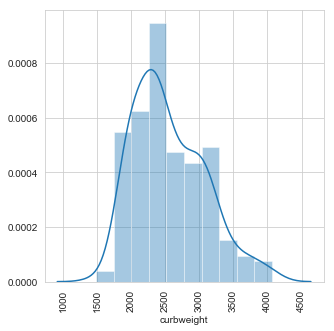

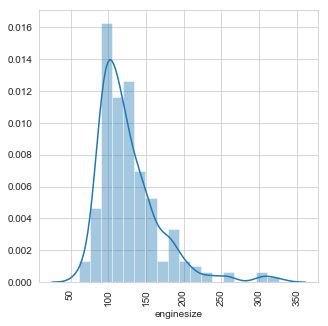

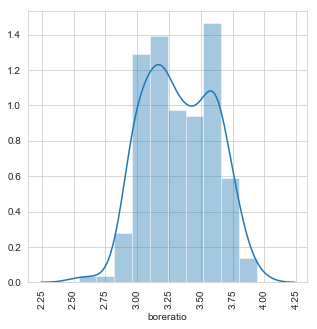

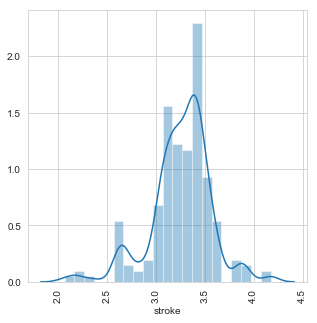

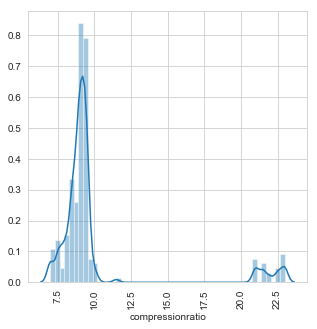

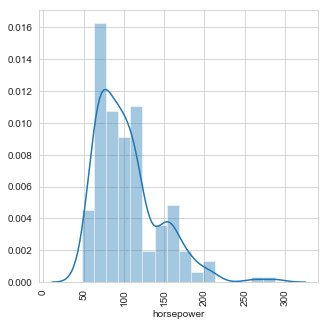

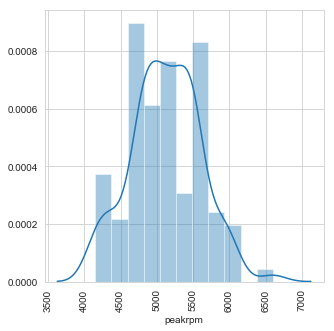

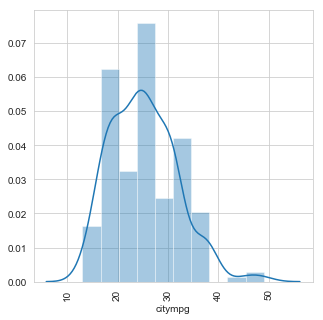

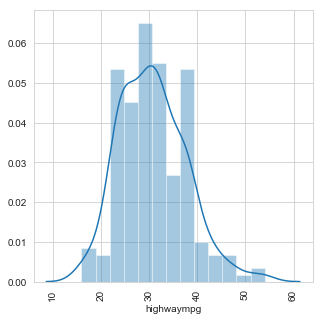

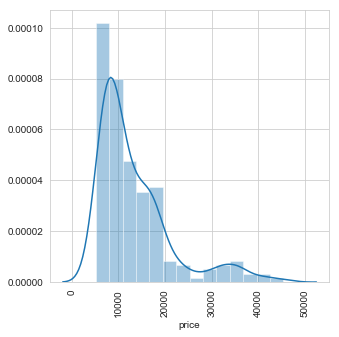

In [27]:
for i in num_var:
    plt.figure(figsize=(5,5))
    sns.distplot(car_df[i])
    plt.xticks(rotation=90)

#### Observations
- While a few features are normally distributed
- Most numeric features are right skewed, it could be due to the outliers

# 6 - Dummy Variable Creation
- Create dummy variables for all categorical variables

In [28]:
# all ategorical variables
print(cat_var)
# total categorical variables
print("\n# Categorical Variables : ", len(cat_var))

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'CarCompany'],
      dtype='object')

# Categorical Variables :  11


In [29]:
# create dummy variables
car_df = pd.get_dummies(car_df, 
               columns=['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
                       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
                       'fuelsystem', 'CarCompany'],
              drop_first=True)

In [30]:
# displat database
car_df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_risky,symboling_safe,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarCompany_audi,CarCompany_bmw,CarCompany_buick,CarCompany_chevrolet,CarCompany_dodge,CarCompany_honda,CarCompany_isuzu,CarCompany_jaguar,CarCompany_mazda,CarCompany_mercury,CarCompany_mitsubishi,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
# dimensions
print("# Rows    : ", car_df.shape[0])
print("# Columns : ", car_df.shape[1])

# Rows    :  205
# Columns :  65


# 7 - Feature Scaling
#### MinMaxScaler

In [32]:
# import the module for feture scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [33]:
# perform scaling
car_df[num_var] = scaler.fit_transform(car_df[num_var])
car_df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_risky,symboling_safe,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarCompany_audi,CarCompany_bmw,CarCompany_buick,CarCompany_chevrolet,CarCompany_dodge,CarCompany_honda,CarCompany_isuzu,CarCompany_jaguar,CarCompany_mazda,CarCompany_mercury,CarCompany_mitsubishi,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.207959,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.282558,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,0.282558,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,0.219254,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,0.306142,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 8 - Modelling
1. We will use LinearRegression with RFE
2. Statsmodel for statistical analysis and fine tuning

## Train Test Split
- Split the data into training set and testing set

In [34]:
X = car_df.drop("price", axis=1)
y = car_df.pop("price")

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

### Recursive Feature Selection
- We will employ RFE for feature selection for our model
- Assigns weights to features (e.g., the coefficients of a linear model)
- The goal of recursive feature elimination (RFE) is to select the best features by eliminating unrequired features creating smaller and smaller sets
- **RFE accepts the Model (LR) and the top features required as parameters**
- **rfe.support_** tells if the feature is selected or not
- **rfe.ranking_** tells how important a feature is to the model

In [36]:
# import the module for RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [37]:
# LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

# RFE
rfe = RFE(lm, 15)  # top 15 features
rfe = rfe.fit(X_train, y_train)

In [38]:
# create RFE dataframe and rank features
rfe_features = pd.DataFrame({"Feature":list(X_train.columns), "Rank":rfe.ranking_, "Support":rfe.support_})
rfe_features = rfe_features.sort_values(by="Rank")
rfe_features

,Feature,Rank,Support
31,cylindernumber_five,1,True
58,CarCompany_porsche,1,True
2,carwidth,1,True
56,CarCompany_peugeot,1,True
4,curbweight,1,True
5,enginesize,1,True
6,boreratio,1,True
7,stroke,1,True
45,CarCompany_bmw,1,True
36,cylindernumber_two,1,True


In [39]:
# select the features with rfe.support_ == True
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'enginelocation_rear', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'CarCompany_bmw', 'CarCompany_peugeot',
       'CarCompany_porsche'],
      dtype='object')

In [40]:
# features that RFE says are NOT useful
X_train.columns[~rfe.support_]

Index(['wheelbase', 'carlength', 'carheight', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'symboling_risky', 'symboling_safe',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'cylindernumber_six',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'CarCompany_audi', 'CarCompany_buick',
       'CarCompany_chevrolet', 'CarCompany_dodge', 'CarCompany_honda',
       'CarCompany_isuzu', 'CarCompany_jaguar', 'CarCompany_mazda',
       'CarCompany_mercury', 'CarCompany_mitsubishi', 'CarCompany_nissan',
       'CarCompany_plymouth', 'CarCompany_renault', 'CarCompany_subaru',
       'CarCompany_toyota', 'CarCompany_volkswagen', 'Ca

### Build a Model using STATSMODEL
- Let's analyse what stats we get with RFE selected features

In [41]:
# create a dataframe with the RFE selected features
X_train_rfe = X_train[rfe_col]

In [42]:
# import the module for statmodel linear regression
import statsmodels.api as sm

# add a SM constant
X_train_rfe = sm.add_constant(X_train_rfe)

In [43]:
# Linear Regression
lm = sm.OLS(y_train, X_train_rfe).fit()

# summary LR model performance
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Sat, 14 Dec 2019   Prob (F-statistic):           1.03e-70
Time:                        18:36:38   Log-Likelihood:                 232.74
No. Observations:                 143   AIC:                            -435.5
Df Residuals:                     128   BIC:                            -391.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1988      0.033     -6.039      0.000      -0.264      -0.134
carwidth                  0.3119      0.056      5.548      0.000       0.201       0.423
curbweight                0.3401      0.067      5.048      0.000       0.207       0.473
enginesize                1.1118      0.143      7.786      0.000       0.829       1.394
boreratio                -0.3576      0.054     -6.662      0.000      -0.464      -0.251
stroke                   -0.2515      0.044     -5.666      0.000      -0.339      -0.164
enginelocation_rear       0.3151      0.067      4.700      0.000       0.182       0.448
enginetype_rotor          0.2141      0.030      7.193      0.000       0.155       0.273
cylindernumber_five       0.1421      0.029      4.819      0.000       0.084       0.200
cylindernumber_four       0.2030      0.035      5.819      0.000       0.134       0.272
cylindernumber_three      0.4091      0.067      6.095      0.000       0.276       0.542
cylindernumber_twelve    -0.4008      0.088     -4.553      0.000      -0.575      -0.227
cylindernumber_two        0.2141      0.030      7.193      0.000       0.155       0.273
CarCompany_bmw            0.2535      0.024     10.632      0.000       0.206       0.301
CarCompany_peugeot       -0.0981      0.024     -4.115      0.000      -0.145      -0.051
CarCompany_porsche        0.1599      0.040      3.965      0.000       0.080       0.240
==============================================================================
Omnibus:                       22.727   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.186
Skew:                           0.769   Prob(JB):                     5.10e-09
Kurtosis:                       5.011   Cond. No.                     2.21e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.78e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Observations
- R-squared      : 0.939
- Adj. R-squared : 0.933
- These values are too good to be true
- This is a clear case of overfitting due to the multi-collinearity

### VIF
- To overcome the overfitting of our model, we will use VIF
- **VIF helps explaining the relationship of one variable with another**

In [44]:
# print features of X_train_rfe
X_train_rfe.columns

Index(['const', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'enginelocation_rear', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'CarCompany_bmw', 'CarCompany_peugeot',
       'CarCompany_porsche'],
      dtype='object')

In [45]:
# import the module to check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# drop constant values - 'const'
X_train_vif = X_train_rfe.drop("const", axis=1)

# calculate VIFs for the new model
vif = pd.DataFrame()  # create empty DataFrame
X = X_train_vif
vif["Features"] = X.columns  # store the features
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]  # store the VIF values
vif["VIF"] = round(vif["VIF"], 2)  # round VIF values to 2 digits
vif = vif.sort_values(by = "VIF", ascending=False)  # sort by VIF values
vif  # display VIF dataframe

,Features,VIF
6,enginetype_rotor,inf
11,cylindernumber_two,inf
2,enginesize,89.17
1,curbweight,54.13
3,boreratio,54.00
0,carwidth,41.57
4,stroke,36.85
8,cylindernumber_four,34.14
10,cylindernumber_twelve,3.00
7,cylindernumber_five,2.86


#### Observations
- 2 features have VIF = infinity
    - `enginetype_rotor` & `cylindernumber_two`
    - They were divided by 0
    - Thus, their R-squared values must be 1
- Generally we select the features having a VIF less than 5

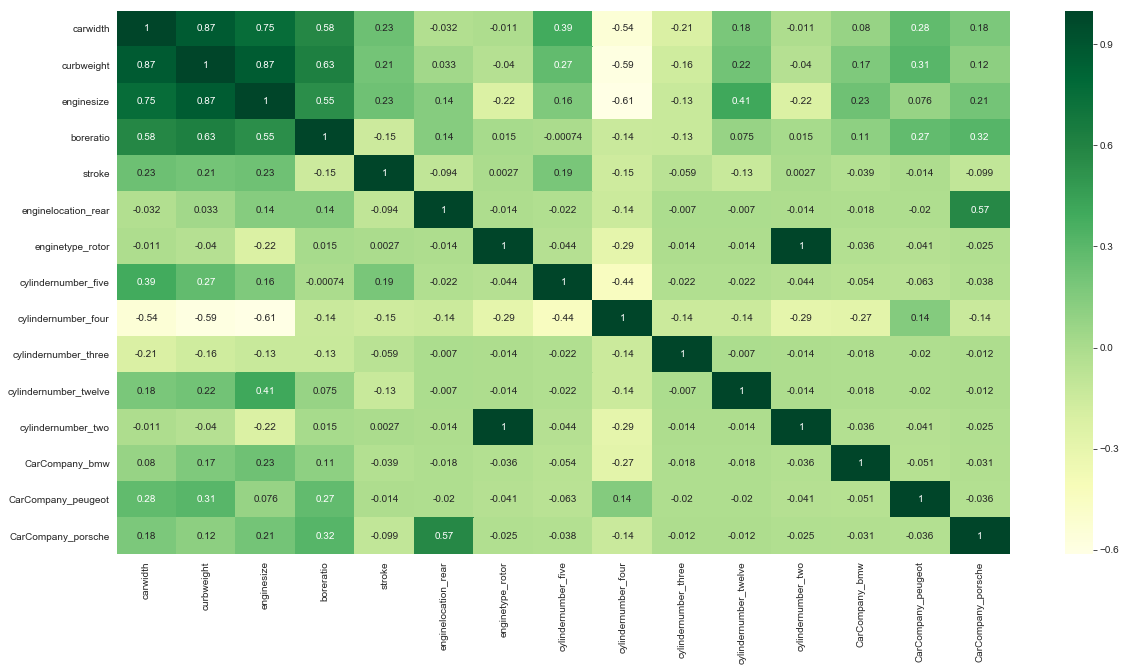

In [46]:
# Let's correlation between different features of X_train_vif
plt.figure(figsize = (20,10))
sns.heatmap(X_train_vif.corr(), annot=True, cmap="YlGn")

#### Observations
- Some of the features have very high correlation
- The 2 features with VIF = infinity have a perfect correlation between each other
- Let's drop features one at a time to see progress

#### Dropping 'enginetype_rotor' (VIF = infinity)

In [47]:
# drop 'enginetype_rotor'
X_train_rfe_2 = X_train_rfe.drop("enginetype_rotor", axis=1)

### Re-modelling x2

In [48]:
# Add a constant variable
X_train_lm = sm.add_constant(X_train_rfe_2)

# Linear Regression
lm = sm.OLS(y_train, X_train_lm).fit()

# model summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Sat, 14 Dec 2019   Prob (F-statistic):           1.03e-70
Time:                        18:36:39   Log-Likelihood:                 232.74
No. Observations:                 143   AIC:                            -435.5
Df Residuals:                     128   BIC:                            -391.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1988      0.033     -6.039      0.000      -0.264      -0.134
carwidth                  0.3119      0.056      5.548      0.000       0.201       0.423
curbweight                0.3401      0.067      5.048      0.000       0.207       0.473
enginesize                1.1118      0.143      7.786      0.000       0.829       1.394
boreratio                -0.3576      0.054     -6.662      0.000      -0.464      -0.251
stroke                   -0.2515      0.044     -5.666      0.000      -0.339      -0.164
enginelocation_rear       0.3151      0.067      4.700      0.000       0.182       0.448
cylindernumber_five       0.1421      0.029      4.819      0.000       0.084       0.200
cylindernumber_four       0.2030      0.035      5.819      0.000       0.134       0.272
cylindernumber_three      0.4091      0.067      6.095      0.000       0.276       0.542
cylindernumber_twelve    -0.4008      0.088     -4.553      0.000      -0.575      -0.227
cylindernumber_two        0.4283      0.060      7.193      0.000       0.310       0.546
CarCompany_bmw            0.2535      0.024     10.632      0.000       0.206       0.301
CarCompany_peugeot       -0.0981      0.024     -4.115      0.000      -0.145      -0.051
CarCompany_porsche        0.1599      0.040      3.965      0.000       0.080       0.240
==============================================================================
Omnibus:                       22.727   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.186
Skew:                           0.769   Prob(JB):                     5.10e-09
Kurtosis:                       5.011   Cond. No.                         71.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observations
- Super high R-squared & Adj. R-squared values
- Model is still overfitting

### VIF

In [49]:
# drop constant values - 'const'
X_train_vif_2 = X_train_rfe_2.drop("const", axis=1)

# calculate VIFs for the new model
vif = pd.DataFrame()  # create empty DataFrame
X = X_train_vif_2
vif["Features"] = X.columns  # store the features
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]  # store the VIF values
vif["VIF"] = round(vif["VIF"], 2)  # round VIF values to 2 digits
vif = vif.sort_values(by = "VIF", ascending=False)  # sort by VIF values
vif  # display VIF dataframe

,Features,VIF
2,enginesize,89.17
1,curbweight,54.13
3,boreratio,54.00
0,carwidth,41.57
4,stroke,36.85
7,cylindernumber_four,34.14
10,cylindernumber_two,4.72
9,cylindernumber_twelve,3.00
6,cylindernumber_five,2.86
13,CarCompany_porsche,1.92


#### Observations
- No more features with infinite VIF
- `cylindernumber_two` has reduced from infinity to 4.72
- Some features still have a very high VIF

#### Dropping `enginesize`	(VIF = 89.17)

In [50]:
# drop 'enginesize'
X_train_rfe_3 = X_train_rfe_2.drop('enginesize', axis=1)

### Re-modelling x3

In [51]:
# add a constant variable
X_train_lm = sm.add_constant(X_train_rfe_3)

# Linear Regression
lm = sm.OLS(y_train, X_train_lm).fit()

# model summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     101.3
Date:                Sat, 14 Dec 2019   Prob (F-statistic):           5.01e-61
Time:                        18:36:39   Log-Likelihood:                 205.02
No. Observations:                 143   AIC:                            -382.0
Df Residuals:                     129   BIC:                            -340.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1367      0.039     -3.540      0.001      -0.213      -0.060
carwidth                  0.3383      0.068      4.985      0.000       0.204       0.473
curbweight                0.5754      0.073      7.902      0.000       0.431       0.720
boreratio                -0.0906      0.050     -1.815      0.072      -0.189       0.008
stroke                   -0.0268      0.041     -0.656      0.513      -0.107       0.054
enginelocation_rear       0.3837      0.080      4.775      0.000       0.225       0.543
cylindernumber_five      -0.0092      0.027     -0.342      0.733      -0.062       0.044
cylindernumber_four      -0.0046      0.027     -0.170      0.866      -0.058       0.049
cylindernumber_three      0.1737      0.072      2.397      0.018       0.030       0.317
cylindernumber_twelve     0.1370      0.066      2.075      0.040       0.006       0.268
cylindernumber_two        0.0408      0.040      1.032      0.304      -0.037       0.119
CarCompany_bmw            0.2401      0.029      8.351      0.000       0.183       0.297
CarCompany_peugeot       -0.1338      0.028     -4.731      0.000      -0.190      -0.078
CarCompany_porsche        0.1434      0.049      2.945      0.004       0.047       0.240
==============================================================================
Omnibus:                       21.617   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.220
Skew:                           0.641   Prob(JB):                     1.52e-10
Kurtosis:                       5.439   Cond. No.                         31.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observations
- Some reduction in Overfitting
- Lowered R-sq & Adj. R-sq values
- `cylindernumber_five` & `cylindernumber_four` have very high p-values

### VIF

In [52]:
# drop constant values - 'const'
X_train_vif_3 = X_train_rfe_3.drop("const", axis=1)

# calculate VIFs for the new model
vif = pd.DataFrame()  # create empty DataFrame
X = X_train_vif_3
vif["Features"] = X.columns  # store the features
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]  # store the VIF values
vif["VIF"] = round(vif["VIF"], 2)  # round VIF values to 3 digits
vif = vif.sort_values(by = "VIF", ascending=False)  # sort by VIF values
vif  # display VIF dataframe

,Features,VIF
1,curbweight,42.08
0,carwidth,40.90
2,boreratio,32.26
3,stroke,17.91
6,cylindernumber_four,12.95
12,CarCompany_porsche,1.92
5,cylindernumber_five,1.71
4,enginelocation_rear,1.64
11,CarCompany_peugeot,1.49
9,cylindernumber_two,1.46


#### Observations
- Reduction in VIF values
- `cylindernumber_four` has a VIF of 12.95

#### Dropping `cylindernumber_four`

In [53]:
# drop 'cylindernumber_four'
X_train_rfe_4 = X_train_rfe_3.drop("cylindernumber_four", axis=1)

### Re-modelling x4

In [54]:
# add a constant variable
X_train_lm = sm.add_constant(X_train_rfe_4)

# Linear Regression
lm = sm.OLS(y_train, X_train_lm).fit()

# model summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     110.5
Date:                Sat, 14 Dec 2019   Prob (F-statistic):           4.72e-62
Time:                        18:36:39   Log-Likelihood:                 205.00
No. Observations:                 143   AIC:                            -384.0
Df Residuals:                     130   BIC:                            -345.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1408      0.030     -4.689      0.000      -0.200      -0.081
carwidth                  0.3400      0.067      5.089      0.000       0.208       0.472
curbweight                0.5831      0.057     10.242      0.000       0.470       0.696
boreratio                -0.0953      0.041     -2.304      0.023      -0.177      -0.013
stroke                   -0.0284      0.039     -0.720      0.473      -0.106       0.050
enginelocation_rear       0.3869      0.078      4.969      0.000       0.233       0.541
cylindernumber_five      -0.0075      0.025     -0.302      0.763      -0.057       0.042
cylindernumber_three      0.1798      0.063      2.867      0.005       0.056       0.304
cylindernumber_twelve     0.1362      0.066      2.076      0.040       0.006       0.266
cylindernumber_two        0.0449      0.031      1.453      0.149      -0.016       0.106
CarCompany_bmw            0.2421      0.026      9.193      0.000       0.190       0.294
CarCompany_peugeot       -0.1362      0.024     -5.586      0.000      -0.184      -0.088
CarCompany_porsche        0.1446      0.048      3.009      0.003       0.050       0.240
==============================================================================
Omnibus:                       21.645   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.814
Skew:                           0.637   Prob(JB):                     1.13e-10
Kurtosis:                       5.463   Cond. No.                         27.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observations
- No change in R-Sq & Adj. R-Sq values
- `cylindernumber_five` has a very high p-values

### VIF

In [55]:
# drop constant values - 'const'
X_train_vif_4 = X_train_rfe_4.drop("const", axis=1)

# calculate VIFs for the new model
vif = pd.DataFrame()  # create empty DataFrame
X = X_train_vif_4
vif["Features"] = X.columns  # store the features
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]  # store the VIF values
vif["VIF"] = round(vif["VIF"], 2)  # round VIF values to 4 digits
vif = vif.sort_values(by = "VIF", ascending=False)  # sort by VIF values
vif  # display VIF dataframe

,Features,VIF
0,carwidth,40.88
1,curbweight,23.24
2,boreratio,13.71
3,stroke,8.92
11,CarCompany_porsche,1.80
4,enginelocation_rear,1.62
5,cylindernumber_five,1.51
10,CarCompany_peugeot,1.29
7,cylindernumber_twelve,1.15
9,CarCompany_bmw,1.13


#### Observations
- Reduction in VIF values
- `cylindernumber_five` has a VIF of 1.51

#### Dropping `cylindernumber_five`

In [56]:
# drop 'cylindernumber_four'
X_train_rfe_5 = X_train_rfe_4.drop("cylindernumber_five", axis=1)

### Re-modelling x5

In [57]:
# add a constant variable
X_train_lm = sm.add_constant(X_train_rfe_5)

# Linear Regression
lm = sm.OLS(y_train, X_train_lm).fit()

# model summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     121.4
Date:                Sat, 14 Dec 2019   Prob (F-statistic):           4.37e-63
Time:                        18:36:39   Log-Likelihood:                 204.95
No. Observations:                 143   AIC:                            -385.9
Df Residuals:                     131   BIC:                            -350.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1400      0.030     -4.698      0.000      -0.199      -0.081
carwidth                  0.3321      0.061      5.419      0.000       0.211       0.453
curbweight                0.5840      0.057     10.310      0.000       0.472       0.696
boreratio                -0.0925      0.040     -2.302      0.023      -0.172      -0.013
stroke                   -0.0279      0.039     -0.711      0.478      -0.106       0.050
enginelocation_rear       0.3840      0.077      4.988      0.000       0.232       0.536
cylindernumber_three      0.1780      0.062      2.862      0.005       0.055       0.301
cylindernumber_twelve     0.1390      0.065      2.151      0.033       0.011       0.267
cylindernumber_two        0.0455      0.031      1.479      0.142      -0.015       0.106
CarCompany_bmw            0.2428      0.026      9.298      0.000       0.191       0.295
CarCompany_peugeot       -0.1347      0.024     -5.660      0.000      -0.182      -0.088
CarCompany_porsche        0.1467      0.047      3.098      0.002       0.053       0.240
==============================================================================
Omnibus:                       22.405   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.286
Skew:                           0.654   Prob(JB):                     3.27e-11
Kurtosis:                       5.529   Cond. No.                         26.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observations
- No change in R-Sq & Adj. R-Sq values
- `stroke` has a very high p-values

### VIF

In [58]:
# drop constant values - 'const'
X_train_vif_5 = X_train_rfe_5.drop("const", axis=1)

# calculate VIFs for the new model
vif = pd.DataFrame()  # create empty DataFrame
X = X_train_vif_5
vif["Features"] = X.columns  # store the features
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]  # store the VIF values
vif["VIF"] = round(vif["VIF"], 2)  # round VIF values to 5 digits
vif = vif.sort_values(by = "VIF", ascending=False)  # sort by VIF values
vif  # display VIF dataframe

,Features,VIF
0,carwidth,34.93
1,curbweight,23.23
2,boreratio,11.94
3,stroke,8.67
10,CarCompany_porsche,1.77
4,enginelocation_rear,1.60
9,CarCompany_peugeot,1.24
6,cylindernumber_twelve,1.13
8,CarCompany_bmw,1.12
5,cylindernumber_three,1.04


#### Observations
- Reduction in VIF values
- `stroke` has a VIF of 8.67

#### Dropping `stroke`

In [59]:
# drop 'cylindernumber_four'
X_train_rfe_6 = X_train_rfe_5.drop("stroke", axis=1)

### Re-modelling x6

In [60]:
# add a constant variable
X_train_lm = sm.add_constant(X_train_rfe_6)

# Linear Regression
lm = sm.OLS(y_train, X_train_lm).fit()

# model summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     134.0
Date:                Sat, 14 Dec 2019   Prob (F-statistic):           4.72e-64
Time:                        18:36:39   Log-Likelihood:                 204.68
No. Observations:                 143   AIC:                            -387.4
Df Residuals:                     132   BIC:                            -354.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1561      0.019     -8.069      0.000      -0.194      -0.118
carwidth                  0.3263      0.061      5.382      0.000       0.206       0.446
curbweight                0.5767      0.056     10.374      0.000       0.467       0.687
boreratio                -0.0819      0.037     -2.199      0.030      -0.156      -0.008
enginelocation_rear       0.3848      0.077      5.008      0.000       0.233       0.537
cylindernumber_three      0.1785      0.062      2.875      0.005       0.056       0.301
cylindernumber_twelve     0.1504      0.063      2.405      0.018       0.027       0.274
cylindernumber_two        0.0451      0.031      1.468      0.145      -0.016       0.106
CarCompany_bmw            0.2445      0.026      9.413      0.000       0.193       0.296
CarCompany_peugeot       -0.1332      0.024     -5.630      0.000      -0.180      -0.086
CarCompany_porsche        0.1477      0.047      3.126      0.002       0.054       0.241
==============================================================================
Omnibus:                       22.096   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.356
Skew:                           0.664   Prob(JB):                     1.42e-10
Kurtosis:                       5.419   Cond. No.                         24.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observations
- Little reduction in R-Sq & Adj. R-Sq values
- `cylindernumber_two` has the highest p-value

### VIF

In [61]:
# drop constant values - 'const'
X_train_vif_6 = X_train_rfe_6.drop("const", axis=1)

# calculate VIFs for the new model
vif = pd.DataFrame()  # create empty DataFrame
X = X_train_vif_6
vif["Features"] = X.columns  # store the features
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]  # store the VIF values
vif["VIF"] = round(vif["VIF"], 2)  # round VIF values to 6 digits
vif = vif.sort_values(by = "VIF", ascending=False)  # sort by VIF values
vif  # display VIF dataframe

,Features,VIF
0,carwidth,27.65
1,curbweight,22.75
2,boreratio,11.07
9,CarCompany_porsche,1.62
3,enginelocation_rear,1.58
8,CarCompany_peugeot,1.18
7,CarCompany_bmw,1.12
5,cylindernumber_twelve,1.07
6,cylindernumber_two,1.04
4,cylindernumber_three,1.02


#### Observations
- Reduction in VIF values
- `carwidth` VIF value reduced to 27.65

#### Dropping `cylindernumber_two`

In [62]:
# drop 'cylindernumber_four'
X_train_rfe_7 = X_train_rfe_6.drop("cylindernumber_two", axis=1)

### Re-modelling x7

In [63]:
# add a constant variable
X_train_lm = sm.add_constant(X_train_rfe_7)

# Linear Regression
lm = sm.OLS(y_train, X_train_lm).fit()

# model summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     147.4
Date:                Sat, 14 Dec 2019   Prob (F-statistic):           1.09e-64
Time:                        18:36:39   Log-Likelihood:                 203.52
No. Observations:                 143   AIC:                            -387.0
Df Residuals:                     133   BIC:                            -357.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1562      0.019     -8.043      0.000      -0.195      -0.118
carwidth                  0.3307      0.061      5.437      0.000       0.210       0.451
curbweight                0.5710      0.056     10.252      0.000       0.461       0.681
boreratio                -0.0783      0.037     -2.099      0.038      -0.152      -0.005
enginelocation_rear       0.3865      0.077      5.010      0.000       0.234       0.539
cylindernumber_three      0.1777      0.062      2.851      0.005       0.054       0.301
cylindernumber_twelve     0.1497      0.063      2.384      0.019       0.025       0.274
CarCompany_bmw            0.2433      0.026      9.332      0.000       0.192       0.295
CarCompany_peugeot       -0.1348      0.024     -5.679      0.000      -0.182      -0.088
CarCompany_porsche        0.1442      0.047      3.043      0.003       0.050       0.238
==============================================================================
Omnibus:                       20.602   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.955
Skew:                           0.639   Prob(JB):                     2.11e-09
Kurtosis:                       5.253   Cond. No.                         24.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observations
- Little reduction in R-Sq & Adj. R-Sq values

### VIF

In [64]:
# drop constant values - 'const'
X_train_vif_7 = X_train_rfe_7.drop("const", axis=1)

# calculate VIFs for the new model
vif = pd.DataFrame()  # create empty DataFrame
X = X_train_vif_7
vif["Features"] = X.columns  # store the features
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]  # store the VIF values
vif["VIF"] = round(vif["VIF"], 2)  # round VIF values to 6 digits
vif = vif.sort_values(by = "VIF", ascending=False)  # sort by VIF values
vif  # display VIF dataframe

,Features,VIF
0,carwidth,27.57
1,curbweight,22.63
2,boreratio,11.00
8,CarCompany_porsche,1.61
3,enginelocation_rear,1.58
7,CarCompany_peugeot,1.18
6,CarCompany_bmw,1.12
5,cylindernumber_twelve,1.07
4,cylindernumber_three,1.02


#### Observations
- Reduction in VIF values
- VIF value of `carwidth` increased to 27.65

#### Dropping `carwidth`

In [65]:
# drop 'cylindernumber_four'
X_train_rfe_8 = X_train_rfe_7.drop("carwidth", axis=1)

### Re-modelling

In [66]:
# add a constant variable
X_train_lm = sm.add_constant(X_train_rfe_8)

# Linear Regression
lm = sm.OLS(y_train, X_train_lm).fit()

# model summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     133.6
Date:                Sat, 14 Dec 2019   Prob (F-statistic):           5.28e-60
Time:                        18:36:39   Log-Likelihood:                 189.17
No. Observations:                 143   AIC:                            -360.3
Df Residuals:                     134   BIC:                            -333.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1057      0.019     -5.627      0.000      -0.143      -0.069
curbweight                0.8153      0.036     22.497      0.000       0.744       0.887
boreratio                -0.0732      0.041     -1.781      0.077      -0.154       0.008
enginelocation_rear       0.2712      0.082      3.319      0.001       0.110       0.433
cylindernumber_three      0.1259      0.068      1.855      0.066      -0.008       0.260
cylindernumber_twelve     0.1460      0.069      2.111      0.037       0.009       0.283
CarCompany_bmw            0.2251      0.028      7.903      0.000       0.169       0.281
CarCompany_peugeot       -0.1316      0.026     -5.034      0.000      -0.183      -0.080
CarCompany_porsche        0.2140      0.050      4.259      0.000       0.115       0.313
==============================================================================
Omnibus:                       18.903   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.663
Skew:                          -0.152   Prob(JB):                     1.85e-18
Kurtosis:                       6.690   Cond. No.                         19.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observations
- Reduced R-sq & Adj. R-sq values

### VIF

In [67]:
# drop constant values - 'const'
X_train_vif_8 = X_train_rfe_8.drop("const", axis=1)

# calculate VIFs for the new model
vif = pd.DataFrame()  # create empty DataFrame
X = X_train_vif_8
vif["Features"] = X.columns  # store the features
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]  # store the VIF values
vif["VIF"] = round(vif["VIF"], 2)  # round VIF values to 6 digits
vif = vif.sort_values(by = "VIF", ascending=False)  # sort by VIF values
vif  # display VIF dataframe

,Features,VIF
0,curbweight,8.85
1,boreratio,8.48
7,CarCompany_porsche,1.59
2,enginelocation_rear,1.50
6,CarCompany_peugeot,1.17
5,CarCompany_bmw,1.09
4,cylindernumber_twelve,1.07
3,cylindernumber_three,1.01


#### Observations
- Great improvement in VIF values
- We still have a few variables with VIF greater than 5
- `boreratio` has VIF value of 8.48

#### Drop `boreratio`

In [70]:
# drop 'boreratio'
X_train_rfe_9 = X_train_rfe_8.drop("boreratio", axis=1)

### Re-modelling

In [71]:
# add a constant variable
X_train_lm = sm.add_constant(X_train_rfe_9)

# Linear Regression
lm = sm.OLS(y_train, X_train_lm).fit()

# model summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     149.9
Date:                Sat, 14 Dec 2019   Prob (F-statistic):           1.97e-60
Time:                        18:39:46   Log-Likelihood:                 187.50
No. Observations:                 143   AIC:                            -359.0
Df Residuals:                     135   BIC:                            -335.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1302      0.013    -10.087      0.000      -0.156      -0.105
curbweight                0.7791      0.030     25.755      0.000       0.719       0.839
enginelocation_rear       0.2772      0.082      3.369      0.001       0.114       0.440
cylindernumber_three      0.1310      0.068      1.917      0.057      -0.004       0.266
cylindernumber_twelve     0.1528      0.070      2.195      0.030       0.015       0.290
CarCompany_bmw            0.2230      0.029      7.776      0.000       0.166       0.280
CarCompany_peugeot       -0.1380      0.026     -5.287      0.000      -0.190      -0.086
CarCompany_porsche        0.1875      0.048      3.876      0.000       0.092       0.283
==============================================================================
Omnibus:                       14.160   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               46.339
Skew:                          -0.024   Prob(JB):                     8.66e-11
Kurtosis:                       5.788   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observations
- Stable R-sq & Adj. R-sq values

### VIF

In [73]:
# drop constant values - 'const'
X_train_vif_9 = X_train_rfe_9.drop("const", axis=1)

# calculate VIFs for the new model
vif = pd.DataFrame()  # create empty DataFrame
X = X_train_vif_9
vif["Features"] = X.columns  # store the features
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]  # store the VIF values
vif["VIF"] = round(vif["VIF"], 2)  # round VIF values to 6 digits
vif = vif.sort_values(by = "VIF", ascending=False)  # sort by VIF values
vif  # display VIF dataframe

,Features,VIF
6,CarCompany_porsche,1.55
1,enginelocation_rear,1.50
0,curbweight,1.33
5,CarCompany_peugeot,1.16
4,CarCompany_bmw,1.09
3,cylindernumber_twelve,1.04
2,cylindernumber_three,1.00


# 9 - Residual Analysis of Train Data
- Check if the error terms are normally distributed or not

Text(0.5,0,'Error Distribution')

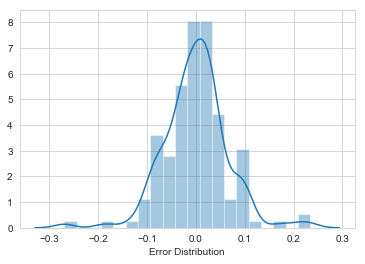

In [76]:
# make prediction with the model
y_train_price = lm.predict(X_train_lm)

# plot histogram of error terms
sns.distplot((y_train - y_train_price), bins=20)
plt.xlabel('Error Distribution')  

#### Observation
- The error terms are normally distributed
- Our model is making correct predictions

# 10 - Predictions



In [77]:
# create a new X_test dataframe from the existing features
X_test_new = X_test[X_train_vif_9.columns]

# add a constant variable
X_test_new = sm.add_constant(X_test_new)

In [78]:
# make predictions
y_pred = lm.predict(X_test_new)

# 11 - Evaluate Model
- Plot `y_test` & `y_pred` to understand the spread

Text(0,0.5,'y_pred')

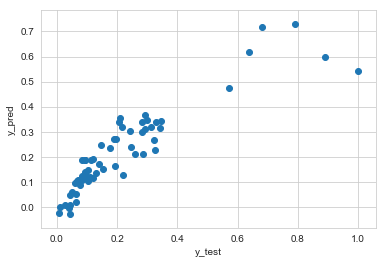

In [82]:
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

#### Observations
- `y_test` & `y_pred` are distributed linearly

### MSE - Mean Squared Error & R2 Score

In [83]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Model RMSE:',rmse)

from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print('Model r2_score:',r2)

Model RMSE: 0.08935455055319073
Model r2_score: 0.814997806914449


#### Observations
- RMSE (error) is very low
- R2 Score is high

# 12 - Conclusion
The final model has the most significant features

In [85]:
# most significant features
for i in X_train_vif_9.columns: print(i)

curbweight
enginelocation_rear
cylindernumber_three
cylindernumber_twelve
CarCompany_bmw
CarCompany_peugeot
CarCompany_porsche


### Heatmap - Correlation

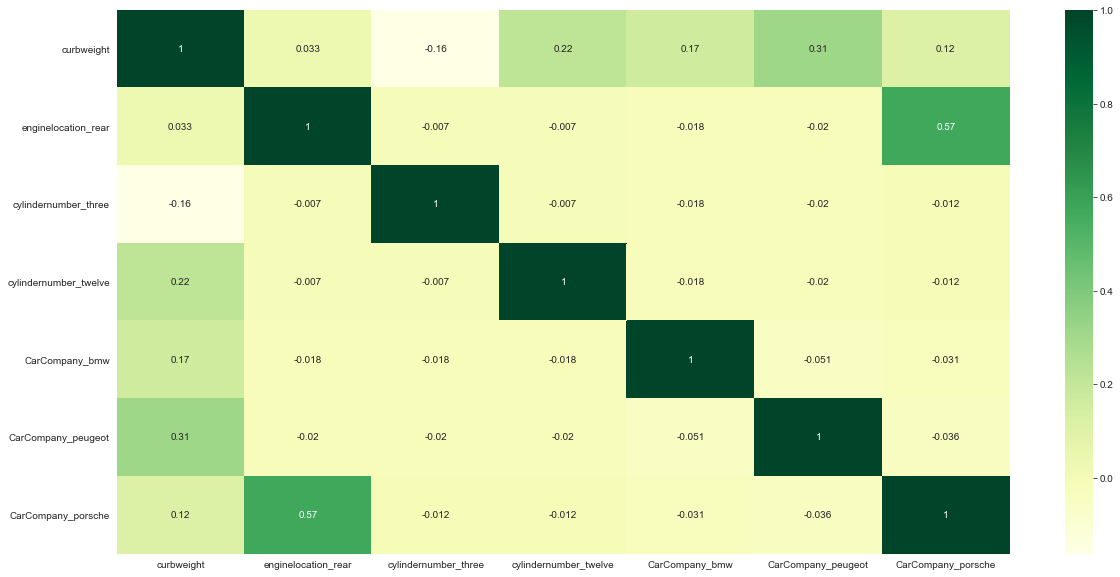

In [88]:
# heatmap
plt.figure(figsize=(20,10))
sns.heatmap(X_train_vif_9.corr(), annot=True, cmap="YlGn")

# 13. Inferences and Conclusions

#### The final model contains only highly significant variables and neglible multicollinearity due to the following reasons listed below,
1. Negligible redundant variables are present in the model.
2. The model is predicting well as the final `y_test` vs `y_pred` graph was a linear spread.
3. We have achieved a significantly low value of Mean Squared Error (0.09), which too indicates a good fit.
4. As R-squared is more than 80%, the model data is fitting very well.
5. Therefore, we can surely conclude that the final model is predicting the car prices with a good accuracy.

## Results
#### The independent variables, which are significant in predicting the price of a car in US market are as follows (with their coefficients):

1. curbweight -> 0.8671
1. enginelocation_rear -> 0.3085
1. cylindernumber_three -> 0.1458
1. cylindernumber_twelve -> 0.1700
1. CarCompanyName_bmw -> 0.2482
1. CarCompanyName_peugeot -> -0.1535
1. CarCompanyName_porsche -> 0.2087

## Formula Derived from the Model
**Price** = -0.1449 + 0.8671(curbweight) + 0.3085(enginelocation_rear) + 0.1458(cylindernumber_three) + 0.17(cylindernumber_twelve) + 0.2482(CarCompanyName_bmw) - 0.1535(CarCompanyName_peugeot) + 0.2087(CarCompanyName_porsche)

# 14. Recommendations
1. Few features play a big role in the price predection (like `curbweight`, `enginelocation_rear` etc) which the Geel Automotives should pay high importance to while designing their cars.

2. Their direct competitors are **BMW** & **PORSCHE**, therefore they could attempt the following:
     - Not launch as a direct competition to the above brands to reduce prices.
     - Launch in collaboration with these brands.
